# StackOverflow Queries Jul 2008 - Jul 2020 dataset

- This dataset was made using a query to count the number of posts on Stack Overflow tagged with each programming language
- Below is a snapshot of the first 5 rows of data:

In [241]:
import pandas as pd
import matplotlib.pyplot as plt

In [180]:
df = pd.read_csv('QueryResults.csv')
df.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


## Data understanding
- What are the data types?
- How many rows and columns are there?

In [20]:
df.dtypes

m             object
TagName       object
Unnamed: 2     int64
dtype: object

In [24]:
df.shape

(1991, 3)

(Answer) 

- There are only 2 data types, 'object' for both the 'm' and 'TagName' columns and 'int64' for the 'Unnamed: 2' column
- This dataset contains 1991 rows of data, it has 3 columns

## Data cleaning
Currently the column names do not make a lot of sense, the names should be updated to something more useful.
The data types for the column showing datetime needs to be updated 

Replacing the column headings:

In [45]:
df = pd.read_csv('QueryResults.csv', header=0, names=['DATE','TAG','POSTS'])
df.head(5)

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [47]:
df.tail(5)

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


Check for any missing values:

In [58]:
df.isnull().values.any()

False

Fix the data type for the DATE column:

In [62]:
df['DATE']= pd.to_datetime(df['DATE'])

In [72]:
df.dtypes

DATE     datetime64[ns]
TAG              object
POSTS             int64
dtype: object

## Exploratory Data Analysis
1. How many posts are there per language?
2. Which language had the most posts?
3. How many months of posts are there for each language?

1. How many posts are there per language?

In [95]:
df[['TAG','POSTS']].groupby('TAG').sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


2. Which language had the most posts?

In [106]:
df[['TAG','POSTS']].groupby('TAG').sum().sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


(Answer) - Javascript had the highest number of posts during the entire period with 2056510 posts, Assembly had the least with only 34852 posts

3. How many months of posts are there for each language?

In [128]:
df.groupby('TAG')['DATE'].count().sort_values(ascending=False)

TAG
c#            145
assembly      144
c             144
c++           144
delphi        144
java          144
javascript    144
perl          144
php           144
python        144
ruby          144
r             142
swift         135
go            129
Name: DATE, dtype: int64

(Answer) - The above shows that 'Go' has the lowest number of months containing posts with 'Swift' as a close second, this lines up with the release date of each language, as with these two languages being much newer than the others, it makes sense that there are fewer months with posts for each of these languages.

Pivoting the data can also make it easier to identify dates when there are no posts for a particular language:

In [153]:
df.pivot(index='DATE', columns='TAG')

POSTS                                                  \
TAG        assembly       c       c#     c++ delphi     go     java   
DATE                                                                  
2008-07-01      NaN     NaN      3.0     NaN    NaN    NaN      NaN   
2008-08-01      8.0    85.0    511.0   164.0   14.0    NaN    222.0   
2008-09-01     28.0   321.0   1649.0   755.0  105.0    NaN   1137.0   
2008-10-01     15.0   303.0   1989.0   811.0  112.0    NaN   1153.0   
2008-11-01     17.0   259.0   1730.0   735.0  141.0    NaN    958.0   
...             ...     ...      ...     ...    ...    ...      ...   
2020-03-01    317.0  2670.0   8954.0  5107.0  181.0  719.0  13253.0   
2020-04-01    406.0  3472.0  10042.0  6820.0  250.0  887.0  15377.0   
2020-05-01    386.0  3602.0   9923.0  7063.0  221.0  826.0  14711.0   
2020-06-01    363.0  2757.0   9064.0  6161.0  214.0  765.0  13015.0   
2020-07-01    298.0  2294.0   9145.0  5756.0  212.0  743.0  12723.0   

                                                                      
TAG        javascript   perl     php   python       r   ruby   swift  
DATE                                                                  
2008-07-01        NaN    NaN     NaN      NaN     NaN    NaN     NaN  
2008-08-01      162.0   28.0   161.0    124.0     NaN   73.0     NaN  
2008-09-01      640.0  131.0   482.0    542.0     6.0  290.0     NaN  
2008-10-01      725.0  127.0   617.0    510.0     NaN  249.0     NaN  
2008-11-01      579.0   97.0   504.0    452.0     1.0  160.0     NaN  
...               ...    ...     ...      ...     ...    ...     ...  
2020-03-01    20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01    24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01    25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01    23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01    23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]

Removing the 'NaN' values to prevent any distortion to calculations and increase accuracy:

In [171]:
pivoted_df = df.pivot(index='DATE', columns='TAG')
pivoted_df.fillna(0, inplace=True)
pivoted_df

POSTS                                                  \
TAG        assembly       c       c#     c++ delphi     go     java   
DATE                                                                  
2008-07-01      0.0     0.0      3.0     0.0    0.0    0.0      0.0   
2008-08-01      8.0    85.0    511.0   164.0   14.0    0.0    222.0   
2008-09-01     28.0   321.0   1649.0   755.0  105.0    0.0   1137.0   
2008-10-01     15.0   303.0   1989.0   811.0  112.0    0.0   1153.0   
2008-11-01     17.0   259.0   1730.0   735.0  141.0    0.0    958.0   
...             ...     ...      ...     ...    ...    ...      ...   
2020-03-01    317.0  2670.0   8954.0  5107.0  181.0  719.0  13253.0   
2020-04-01    406.0  3472.0  10042.0  6820.0  250.0  887.0  15377.0   
2020-05-01    386.0  3602.0   9923.0  7063.0  221.0  826.0  14711.0   
2020-06-01    363.0  2757.0   9064.0  6161.0  214.0  765.0  13015.0   
2020-07-01    298.0  2294.0   9145.0  5756.0  212.0  743.0  12723.0   

                                                                      
TAG        javascript   perl     php   python       r   ruby   swift  
DATE                                                                  
2008-07-01        0.0    0.0     0.0      0.0     0.0    0.0     0.0  
2008-08-01      162.0   28.0   161.0    124.0     0.0   73.0     0.0  
2008-09-01      640.0  131.0   482.0    542.0     6.0  290.0     0.0  
2008-10-01      725.0  127.0   617.0    510.0     0.0  249.0     0.0  
2008-11-01      579.0   97.0   504.0    452.0     1.0  160.0     0.0  
...               ...    ...     ...      ...     ...    ...     ...  
2020-03-01    20483.0  215.0  6672.0  26673.0  5761.0  780.0  3434.0  
2020-04-01    24634.0  240.0  8060.0  32605.0  7047.0  860.0  4015.0  
2020-05-01    25196.0  228.0  7917.0  34478.0  6833.0  774.0  4066.0  
2020-06-01    23360.0  203.0  7188.0  31817.0  6249.0  670.0  3733.0  
2020-07-01    23802.0  182.0  7334.0  31261.0  5694.0  775.0  3607.0  

[145 rows x 14 columns]

In [176]:
pivoted_df.isna().values.any()

False

## Visualization of the popularity of languages over time

- The popularity of the top 3 languages by number of posts:

In [194]:
pivoted_df.head()

POSTS                                                       \
TAG        assembly      c      c#    c++ delphi   go    java javascript   
DATE                                                                       
2008-07-01      0.0    0.0     3.0    0.0    0.0  0.0     0.0        0.0   
2008-08-01      8.0   85.0   511.0  164.0   14.0  0.0   222.0      162.0   
2008-09-01     28.0  321.0  1649.0  755.0  105.0  0.0  1137.0      640.0   
2008-10-01     15.0  303.0  1989.0  811.0  112.0  0.0  1153.0      725.0   
2008-11-01     17.0  259.0  1730.0  735.0  141.0  0.0   958.0      579.0   

                                                   
TAG          perl    php python    r   ruby swift  
DATE                                               
2008-07-01    0.0    0.0    0.0  0.0    0.0   0.0  
2008-08-01   28.0  161.0  124.0  0.0   73.0   0.0  
2008-09-01  131.0  482.0  542.0  6.0  290.0   0.0  
2008-10-01  127.0  617.0  510.0  0.0  249.0   0.0  
2008-11-01   97.0  504.0  452.0  1.0  160.0   0.0

In [245]:
javascript = pivoted_df[('POSTS', 'javascript')]
java = pivoted_df[('POSTS', 'java')]
python = pivoted_df[('POSTS', 'python')]

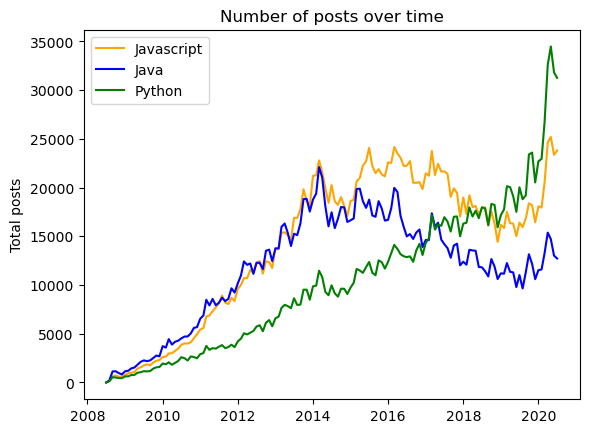

In [285]:
plt.figure()
plt.title('Number of posts over time')
plt.ylabel('Total posts')
plt.plot(javascript, color='Orange', label='Javascript')
plt.plot(java, color='Blue', label='Java')
plt.plot(python, color='Green', label='Python')
plt.legend()

(Answer) 
- Javascript and Java appear to be tied in terms of popularity from 2008 - 2014, with Python growing at about 50% of their rate during the same period.

- From 2014 onwards, Java steadily dips in terms of popularity, where it becomes the least popular around 2018, until a small spike in popularity around 2019. 

- From 2014 onwards, Javascript shows a smal dip in popularity until 2015, where it jumps in popularity. It maintains around the same levels until 2017 where it sees a decline.  

- Javascript then shoots up in poularity around the end of 2019 but remains second place to Python.

- Python sees a steady growth in popularity throughout the period of 2008-2018, from 2018 onwards it slowly becomes the most popular language overtaking the other two and sees a major surge around the end of 2019.

The popularity of the 3 newest languages by number of posts:

In [275]:
swift = pivoted_df[('POSTS', 'swift')]
go = pivoted_df[('POSTS', 'go')]
r = pivoted_df[('POSTS', 'r')]

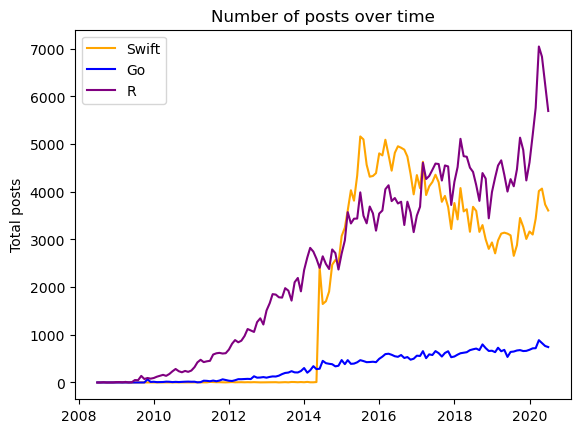

In [283]:
plt.figure()
plt.title('Number of posts over time')
plt.ylabel('Total posts')
plt.plot(swift, color='Orange', label='Swift')
plt.plot(go, color='Blue', label='Go')
plt.plot(r, color='Purple', label='R')
plt.legend()

(Answer)
- R sees the highest growth in popularity out of the 3, with a major spike in popularity around 2019
- Swift sees a sharp spike in growth around the year it is released and is the most popular out the 3 from 2015-2017. Swift loses momentum in its popularity from 2016-2019 before seeing growth until around 2020.
- Go sees a very slow growth in popularity throughout the whole period.

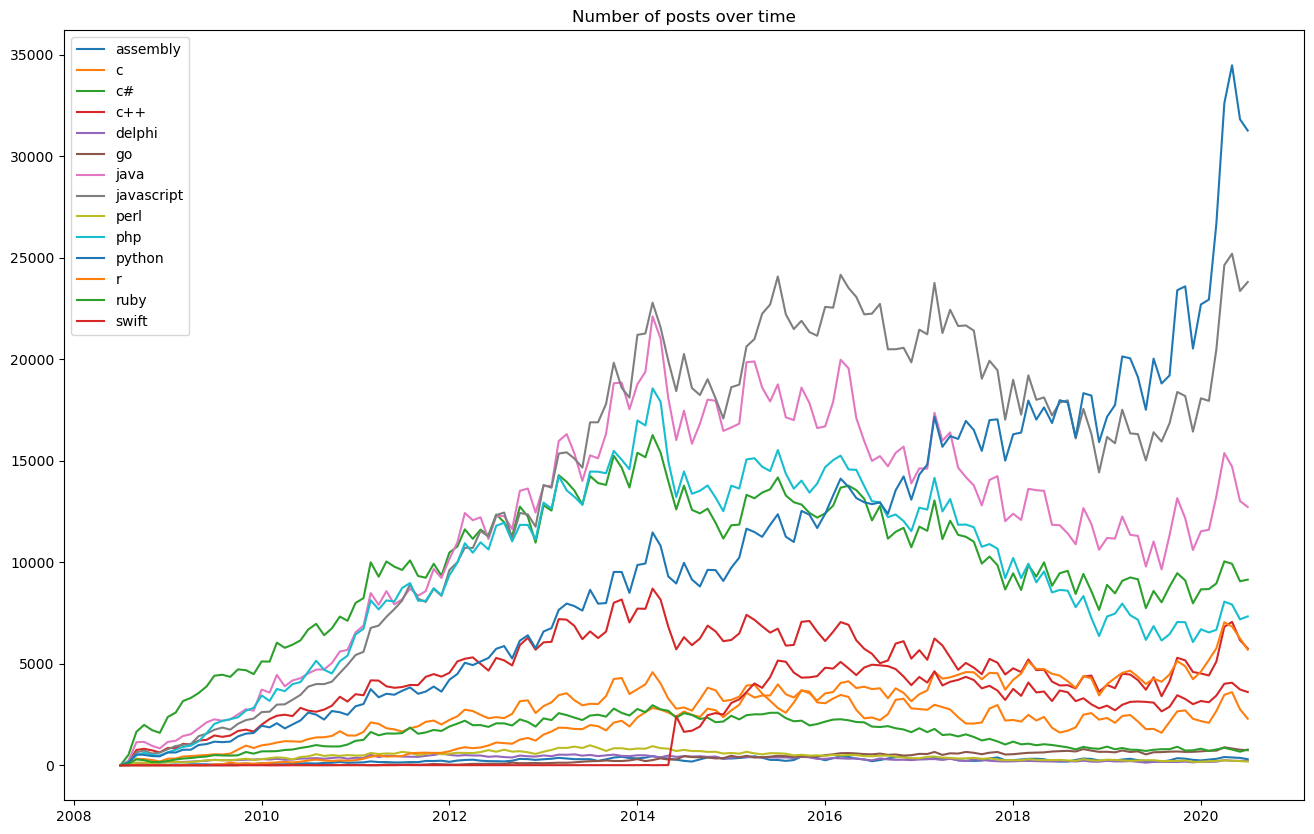

In [331]:
plt.figure(figsize=(16,10))
plt.title('Number of posts over time')
for column in pivoted_df.columns:
    label = column[1]
    plt.plot(pivoted_df.index, pivoted_df[column], label=label)

plt.legend()

(Answer) 
- Due to the number of spikes in the data, it may be more useful to smooth the observations by taking an average

In [346]:
smoothed_df = pivoted_df.rolling(window=6).mean()

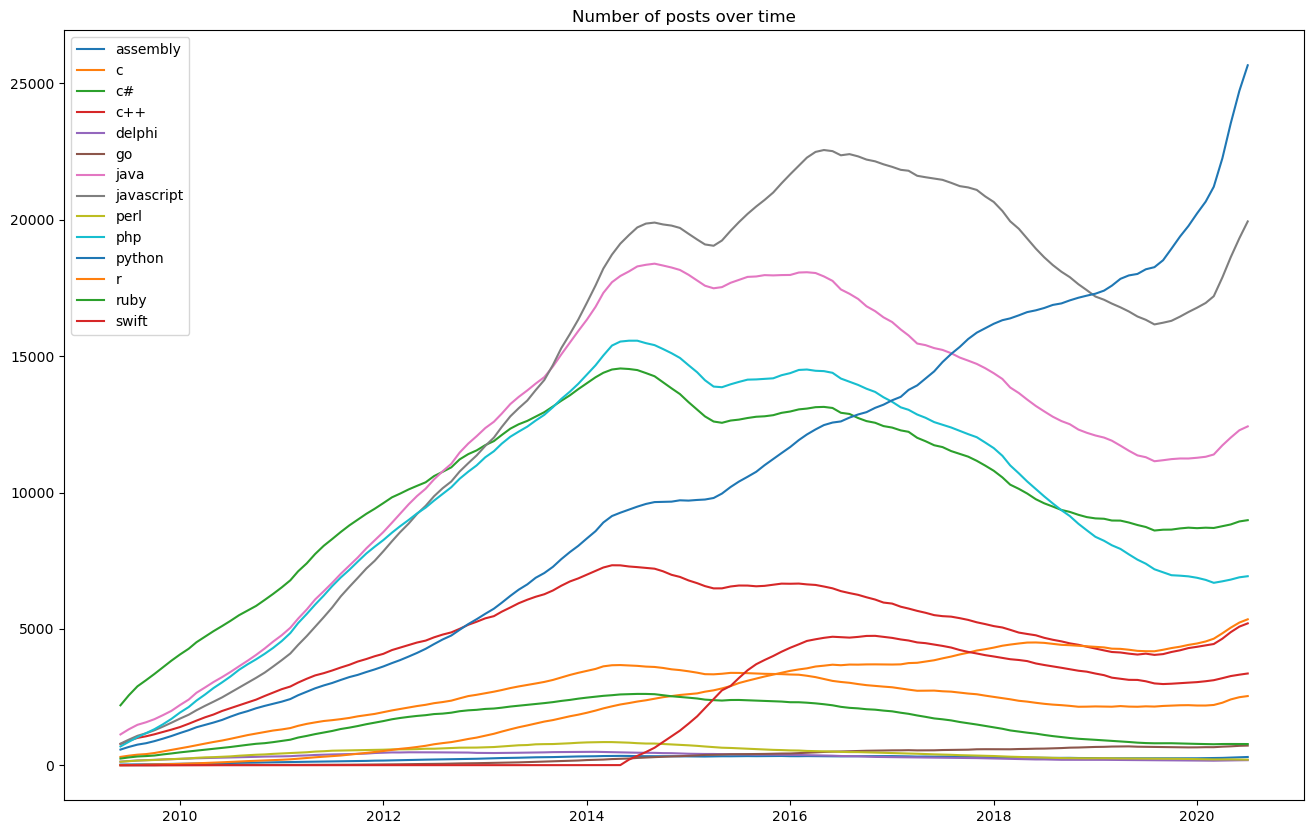

In [342]:
plt.figure(figsize=(16,10))
plt.title('Number of posts over time')
for column in smoothed_df.columns:
    label = column[1]
    plt.plot(smoothed_df.index, smoothed_df[column], label=label)

plt.legend()